In [37]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit
%matplotlib inline

# Read data and limit to 2015 or earlier
df = pd.DataFrame.from_csv('data.csv')
df = df.loc[df['Year'] <= 2015]

Best Fit Line: y=
 
0.001793 x - 0.05104


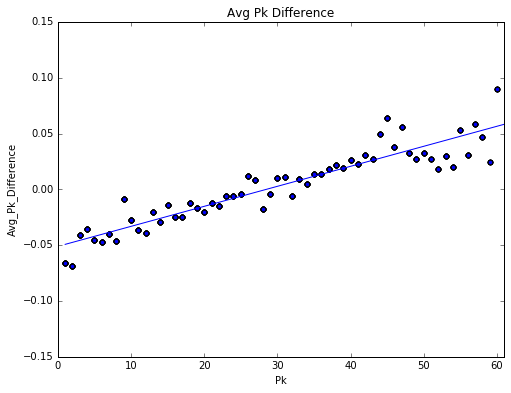

In [38]:
df = df.sort_values(['Year', 'WS/48'], ascending=[True, False])
WS48_Sorted = list(df['WS/48'])
df = df.sort_values(['Year', 'Pk'])
df['WS48_Sorted'] = WS48_Sorted
df.loc[df['Player'] == 'Greg Oden'][['WS/48', 'WS48_Sorted']]
df['Difference'] = df['WS/48'] - df['WS48_Sorted']
# Take average pick difference
df['Avg_Pk_Difference'] = df.groupby('Pk')['Difference'].transform(lambda x: x.mean())

# Line fitting seems to do the trick
X = df['Pk']
Y = df['Difference']
z = np.polyfit(X, Y, 1)   
f = np.poly1d(z)
x_new = np.linspace(1, 61, 500)
y_new = f(x_new)
print "Best Fit Line: y="
print f
df.plot(y='Avg_Pk_Difference', x='Pk', kind='scatter', \
          title='Avg Pk Difference', xlim=(0, 61), ylim=(-0.15, 0.15), figsize=(8, 6))
plt.plot(x_new, y_new)

In [39]:
# Clearly this needs to be accounted for
df = df.sort_values('Pk')
x = df['Pk']
df['Line_Fit_Pk_Difference'] = f[1]*x + f[0]

In [41]:
# Calculate the difference once more
df['Adj_Difference'] = df['Difference'] - df['Line_Fit_Pk_Difference']
# Top rated players
df.sort('Adj_Difference', ascending=False).head(20)[['Year', 'Pk', 'Player', 'Tm', 'Adj_Difference']]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Year,Pk,Player,Tm,Adj_Difference
992,2011,60,Isaiah Thomas,SAC,0.221437
539,2014,41,Nikola Jokic,DEN,0.185510
358,1999,57,Manu Ginobili,SAS,0.178817
67,1998,58,Maceo Baston,TOR,0.170024
1081,2010,33,Hassan Whiteside,SAC,0.158857
796,2005,4,Chris Paul,NOP,0.145864
363,2013,27,Rudy Gobert,UTA,0.142617
554,2010,44,Jerome Jordan,NYK,0.140130
829,2006,49,Leon Powe,BOS,0.137164
636,1999,47,Todd MacCulloch,PHI,0.132750


In [43]:
# Bottom rated players
df.sort('Adj_Difference').head(20)[['Year', 'Pk', 'Player', 'Tm', 'Adj_Difference']]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Year,Pk,Player,Tm,Adj_Difference
907,2011,49,Josh Selby,MEM,-0.149836
10,2006,28,Maurice Ager,DAL,-0.148176
135,2001,37,Damone Brown,PHI,-0.141316
771,1998,1,Michael Olowokandi,LAC,-0.139756
86,2013,1,Anthony Bennett,CLE,-0.138756
598,1996,28,Priest Lauderdale,ATL,-0.137176
969,1998,35,Bruno Sundov,DAL,-0.134730
983,2012,41,Tyshawn Taylor,BRK,-0.131490
715,2006,3,Adam Morrison,CHA,-0.130343
944,2011,21,Nolan Smith,POR,-0.129623


In [44]:
# Add up for each team since 1996
df_TM = df.groupby('Tm').mean()
df_TM = df_TM.sort('Difference', ascending=False)[['Adj_Difference']]
df_TM

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Adj_Difference
Tm,
SAS,0.021591
IND,0.014550
NOP,0.013628
HOU,0.008885
BOS,0.009169
UTA,0.006565
LAL,-0.001257
TOR,0.007749
MIA,-0.000960
